In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.2.0


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
tf.config.experimental.set_memory_growth(device=gpus[1], enable=True)

In [3]:
mnist = keras.datasets.mnist
(x_train_all, y_train_all), (x_test, y_test) = mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              padding='same',
                              activation='relu',
                              input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [6]:
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]

In [7]:
train_datagen = keras.preprocessing.image.ImageDataGenerator()
train_generator = train_datagen.flow(x_train_scaled, y_train, 500)

valid_datagen = keras.preprocessing.image.ImageDataGenerator()
valid_generator = valid_datagen.flow(x_valid_scaled, y_valid, 500)

history = model.fit(train_generator, epochs=10, validation_data = valid_generator, callbacks = callbacks)

Epoch 1/10
110/110 [==============================] - 4s 37ms/step - loss: 2.0441 - accuracy: 0.4042 - val_loss: 1.2295 - val_accuracy: 0.5614
Epoch 2/10
110/110 [==============================] - 4s 34ms/step - loss: 0.5664 - accuracy: 0.8283 - val_loss: 0.2627 - val_accuracy: 0.9264
Epoch 3/10
110/110 [==============================] - 4s 34ms/step - loss: 0.2390 - accuracy: 0.9269 - val_loss: 0.1651 - val_accuracy: 0.9522
Epoch 4/10
110/110 [==============================] - 4s 35ms/step - loss: 0.1731 - accuracy: 0.9472 - val_loss: 0.1366 - val_accuracy: 0.9628
Epoch 5/10
110/110 [==============================] - 4s 36ms/step - loss: 0.1378 - accuracy: 0.9579 - val_loss: 0.1181 - val_accuracy: 0.9676
Epoch 6/10
110/110 [==============================] - 4s 36ms/step - loss: 0.1148 - accuracy: 0.9651 - val_loss: 0.0994 - val_accuracy: 0.9724
Epoch 7/10
110/110 [==============================] - 4s 38ms/step - loss: 0.1004 - accuracy: 0.9689 - val_loss: 0.0874 - val_accuracy: 0.9754

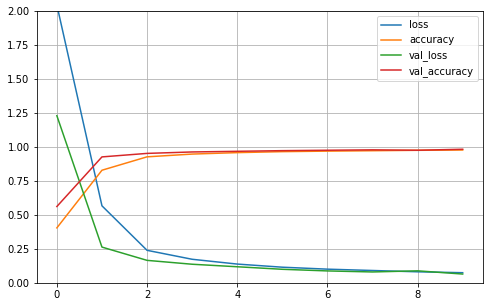

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()

plot_learning_curves(history)

In [9]:
test_datagen = keras.preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow(x_test_scaled, y_test, 500)

In [10]:
model.evaluate(test_generator)

20/20 [==============================] - 0s 11ms/step - loss: 0.0626 - accuracy: 0.9802


[0.06255271285772324, 0.9801999926567078]

In [51]:
result = model.predict(np.expand_dims(x_test_scaled[3], axis=0))
np.argmax(result)

0

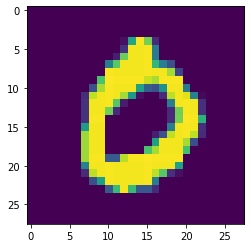

In [52]:
plt.imshow(x_test[3])

In [53]:
!nvidia-smi

Mon Jul  6 15:51:01 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.126.02   Driver Version: 418.126.02   CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:3B:00.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:AF:00.0 Off |                    0 |
| N/A   61C    P0    31W /  70W |  11213MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        